In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Age'].mean()

38.85

In [9]:
df['Annual Income (k$)'].mean()

60.56

In [10]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [11]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [12]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [13]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

In [14]:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace=True)

In [15]:
df.head(2)

,CustomerID,Gender,Age,income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [16]:
df.groupby('Gender')['CustomerID'].count()

Gender
Female    112
Male       88
Name: CustomerID, dtype: int64

In [17]:
df.groupby('Age')['CustomerID'].count()

Age
18     4
19     8
20     5
21     5
22     3
23     6
24     4
25     3
26     2
27     6
28     4
29     5
30     7
31     8
32    11
33     3
34     5
35     9
36     6
37     3
38     6
39     3
40     6
41     2
42     2
43     3
44     2
45     3
46     3
47     6
48     5
49     7
50     5
51     2
52     2
53     2
54     4
55     1
56     1
57     2
58     2
59     4
60     3
63     2
64     1
65     2
66     2
67     4
68     3
69     1
70     2
Name: CustomerID, dtype: int64

In [19]:
df.groupby('income')['CustomerID'].count()

income
15     2
16     2
17     2
18     2
19     4
      ..
103    4
113    2
120    2
126    2
137    2
Name: CustomerID, Length: 64, dtype: int64

K-Means Clustering

In [20]:
df['z_income'] = (df['income']-df['income'].mean())/df['income'].std()

In [21]:
df['z_Age'] = (df['Age']-df['Age'].mean())/df['Age'].std()

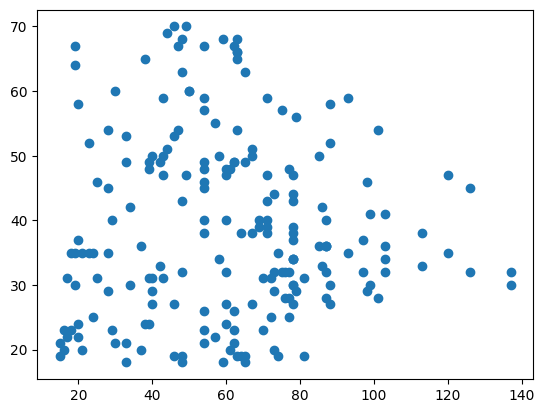

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['income'],df['Age'])

Text(0, 0.5, 'Age')

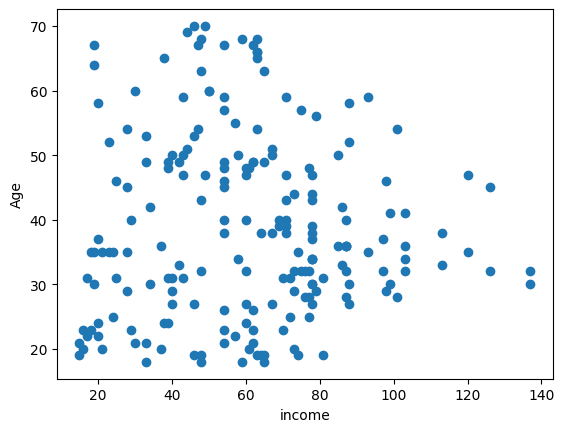

In [23]:
plt.scatter(df['income'],df['Age'])
plt.xlabel('income')
plt.ylabel('Age')

In [24]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=4,random_state=10)
model.fit(df[['z_income','z_Age']])

KMeans(n_clusters=4, random_state=10)

In [25]:
df['clusters'] = model.labels_
df.head()

,CustomerID,Gender,Age,income,Spending Score (1-100),z_income,z_Age,clusters
0,1,Male,19,15,39,-1.734646,-1.421003,2
1,2,Male,21,15,81,-1.734646,-1.277829,2
2,3,Female,20,16,6,-1.696572,-1.349416,2
3,4,Female,23,16,77,-1.696572,-1.134655,2
4,5,Female,31,17,40,-1.658498,-0.561958,2


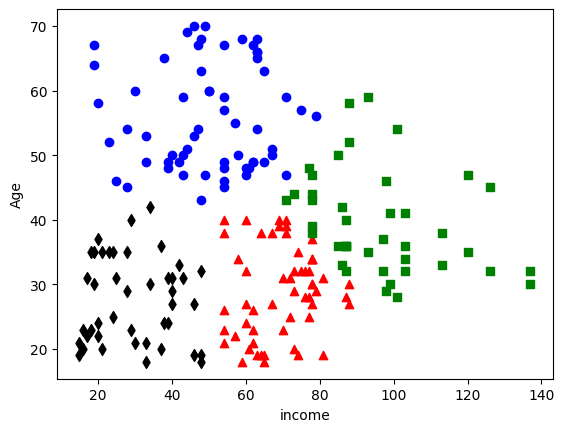

In [26]:
color = ['r','b','k','g']
markers = ['^','o','d','s']
for c in df['clusters'].unique():
    d = df[df['clusters']==c]
    plt.scatter(d['income'],d['Age'], marker = markers[c] , color = color[c])
    
plt.xlabel('income')
plt.ylabel('Age')
plt.show()